# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:

# Try loading one file
import os
import pandas as pd

os.chdir('/content/drive/MyDrive/trip_records')

df = pd.read_parquet('2023-1.parquet')

In [ ]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7         2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9         2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   
5           1.84         1.0                  N           161           137   
6           1.66         1.0                  N           239           143   
7          11.70         1.0                  N           142           200   
8           2.95         1.0                  N           164           236   
9           3.01         1.0                  N           141           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   
5             1         12.8   1.00      0.5       10.00           0.0   
6             1         12.1   1.00      0.5        3.42           0.0   
7             1         45.7   1.00      0.5       10.74           3.0   
8             1         17.7   1.00      0.5        5.68           0.0   
9             2         14.9   1.00      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00  
5                    1.0         27.80                   2.5         0.00  
6                    1.0         20.52                   2.5         0.00  
7                    1.0         64.44                   2.5         0.00  
8                    1.0         28.38                   2.5         0.00  
9                    1.0         19.90                   2.5         0.00

In [ ]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             2         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5       15.00   
3                   7             1        12.10   7.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80   0.00      0.5        3.96   
3066762            75             0        22.43   0.00      0.5        2.64   
3066763           239             0        17.61   0.00      0.5        5.32   
3066764            79             0        18.15   0.00      0.5        4.43   
3066765           143             0        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         0.00  
3                         0.0         1.25  
4                         2.5         0.00  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.041714e+06                     3041714                     3041714   
mean   1.727994e+00  2023-01-17 00:25:41.237371  2023-01-17 00:41:23.730543   
min    1.000000e+00         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%    1.000000e+00         2023-01-09 16:26:13  2023-01-09 16:41:19.250000   
50%    2.000000e+00         2023-01-17 08:45:54  2023-01-17 09:01:55.500000   
75%    2.000000e+00  2023-01-24 16:28:13.750000         2023-01-24 16:44:41   
max    2.000000e+00         2023-02-01 00:56:53         2023-02-02 09:28:47   
std    4.449931e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.970028e+06   3.041714e+06  2.970028e+06  3.041714e+06   
mean      1.362847e+00   3.855076e+00  1.500250e+00  1.664277e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.070000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.340000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   2.589281e+05  9.900000e+01  2.650000e+02   
std       8.974244e-01   2.506002e+02  6.501645e+00  6.424514e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06   
mean   1.644445e+02  1.176704e+00  1.867674e+01  1.558292e+00  4.963051e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  8.600000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.280000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.050000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.160100e+03  1.250000e+01  5.316000e+01   
std    6.993147e+01  4.879234e-01  1.740004e+01  1.778291e+00  5.347396e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  3.041714e+06  3.041714e+06           3.041714e+06  3.041714e+06   
mean   3.394887e+00  5.263212e-01           9.983624e-01  2.744160e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.250000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.548000e+01   
50%    2.750000e+00  0.000000e+00           1.000000e+00  2.016000e+01   
75%    4.200000e+00  0.000000e+00           1.000000e+00  2.890000e+01   
max    3.808000e+02  1.969900e+02           1.000000e+00  1.169400e+03   
std    3.824425e+00  2.015350e+00           3.712896e-02  2.163570e+01   

       congestion_surcharge   airport_fee  
count          2.970028e+06  2.970028e+06  
mean           2.309870e+00  1.098142e-01  
min           -2.500000e+00 -1.250000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.250000e+00  
std            6.630708e-01  3.539063e-01

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
df['hour'] = df['tpep_pickup_datetime'].dt.strftime('%H')

In [ ]:
import pandas as pd
sampled_data = pd.DataFrame()
for date in df['date'].unique():
    for hour_val in df['hour'].unique():
        hour_data = df[(df['date'] == date) & (df['hour'] == hour_val)]
        sample = hour_data.sample(frac=0.05, random_state=42)
        sampled_data = pd.concat([sampled_data, sample])
# sample 0.05 of the hour_data

In [ ]:
sampled_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
2961137         2  2023-01-31 18:44:08   2023-01-31 18:50:36              5.0   
2963870         2  2023-01-31 18:57:56   2023-01-31 19:04:41              1.0   
2965956         1  2023-01-31 18:48:31   2023-01-31 19:01:52              1.0   
2960823         1  2023-01-31 18:21:18   2023-01-31 18:24:01              1.0   
2963148         2  2023-01-31 18:33:26   2023-01-31 18:41:03              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   
...                ...         ...                ...           ...   
2961137           1.56         1.0                  N           140   
2963870           1.79         1.0                  N           237   
2965956           1.10         1.0                  N           170   
2960823           0.30         1.0                  N            87   
2963148           1.75         1.0                  N           186   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
428               256             2  ...    6.0      0.5        0.00   
1113              237             1  ...    1.0      0.5        2.58   
819               141             2  ...    1.0      0.5        0.00   
3192              142             2  ...    1.0      0.5        0.00   
2995263           107             0  ...    0.0      0.5        5.93   
...               ...           ...  ...    ...      ...         ...   
2961137           263             1  ...    2.5      0.5        3.16   
2963870           238             1  ...    2.5      0.5        2.00   
2965956           100             1  ...    5.0      0.5        3.40   
2960823            87             1  ...    5.0      0.5        1.00   
2963148           249             1  ...    2.5      0.5        3.30   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   
...               ...                    ...           ...   
2961137           0.0                    1.0         18.96   
2963870           0.0                    1.0         18.50   
2965956           0.0                    1.0         20.60   
2960823           0.0                    1.0         11.90   
2963148           0.0                    1.0         19.80   

         congestion_surcharge  airport_fee        date hour  
428                       0.0         1.25  2023-01-01   00  
1113                      2.5         0.00  2023-01-01   00  
819                       2.5         0.00  2023-01-01   00  
3192                      2.5         0.00  2023-01-01   00  
2995263                   NaN          NaN  2023-01-01   00  
...                       ...          ...         ...  ...  
2961137                   2.5         0.00  2023-01-31   18  
2963870                   2.5         0.00  2023-01-31   18  
2965956        

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import pandas as pd
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

In [ ]:
# iterate through the list of files and sample one by one:
for trip_records in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), trip_records)

        # Reading the current file
        # Assuming you're using pandas to read the files
        current_month_data = pd.read_csv(file_path) # Replace with actual file reading code
        # Since data is in parquet format, read it with pd.read_parquet
        current_month_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

# Add date and hour information
        current_month_data['tpep_pickup_datetime'] = pd.to_datetime(current_month_data['tpep_pickup_datetime'])
        current_month_data['date'] = current_month_data['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
        current_month_data['hour'] = current_month_data['tpep_pickup_datetime'].dt.strftime('%H')

# Loop through dates and then loop through every hour of each date
        for date in current_month_data['date'].unique():
            for hour in current_month_data['hour'].unique():
                # Select data for the current hour
                hourly_data = current_month_data[(current_month_data['date'] == date) & (current_month_data['hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                # Add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data])
# Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {trip_records}: {e}")

Error reading file 2023-9.parquet: 'utf-8' codec can't decode byte 0xbe in position 31: invalid start byte
Error reading file 2023-5.parquet: 'utf-8' codec can't decode byte 0xbe in position 35: invalid start byte
Error reading file 2023-6.parquet: 'utf-8' codec can't decode byte 0xaa in position 31: invalid start byte
Error reading file 2023-2.parquet: 'utf-8' codec can't decode byte 0x86 in position 31: invalid start byte
Error reading file 2023-1.parquet: 'utf-8' codec can't decode byte 0xfa in position 39: invalid start byte
Error reading file 2023-8.parquet: 'utf-8' codec can't decode byte 0x96 in position 31: invalid start byte
Error reading file 2023-7.parquet: 'utf-8' codec can't decode bytes in position 31-32: invalid continuation byte
Error reading file 2023-10.parquet: 'utf-8' codec can't decode byte 0x82 in position 31: invalid start byte
Error reading file 2023-3.parquet: 'utf-8' codec can't decode byte 0x80 in position 40: invalid start byte
Error reading file 2023-12.par

In [ ]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             2         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5       15.00   
3                   7             1        12.10   7.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80   0.00      0.5        3.96   
3066762            75             0        22.43   0.00      0.5        2.64   
3066763           239             0        17.61   0.00      0.5        5.32   
3066764            79             0        18.15   0.00      0.5        4.43   
3066765           143             0        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         0.00  
3                         0.0         1.25  
4                         2.5         0.00  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('taxi_data_2023_sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
import pandas as pd

df = pd.read_parquet('taxi_data_2023_sampled.parquet')

from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index()


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:32:10   2023-01-01 00:40:36   
1              1         2  2023-01-01 00:55:08   2023-01-01 01:01:27   
2              2         2  2023-01-01 00:25:04   2023-01-01 00:37:49   
3              3         1  2023-01-01 00:03:48   2023-01-01 00:13:25   
4              4         2  2023-01-01 00:10:29   2023-01-01 00:21:19   
...          ...       ...                  ...                   ...   
3041709  3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33   
3041710  3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36   
3041711  3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36   
3041712  3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00   
3041713  3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           0.97         1.0                  N   
1                    1.0           1.10         1.0                  N   
2                    1.0           2.51         1.0                  N   
3                    0.0           1.90         1.0                  N   
4                    1.0           1.43         1.0                  N   
...                  ...            ...         ...                ...   
3041709              NaN           3.05         NaN               None   
3041710              NaN           5.80         NaN               None   
3041711              NaN           4.67         NaN               None   
3041712              NaN           3.15         NaN               None   
3041713              NaN           2.85         NaN               None   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 161           141             2         9.30   1.00   
1                  43           237             1         7.90   1.00   
2                  48           238             1        14.90   1.00   
3                 138             7             1        12.10   7.25   
4                 107            79             1        11.40   1.00   
...               ...           ...           ...          ...    ...   
3041709           107            48             0        15.80   0.00   
3041710           112            75             0        22.43   0.00   
3041711           114           239             0        17.61   0.00   
3041712           230            79             0        18.15   0.00   
3041713           262           143             0        15.97   0.00   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        0.00           0.0                    1.0   
1            0.5        4.00           0.0                    1.0   
2            0.5       15.00           0.0                    1.0   
3            0.5        0.00           0.0                    1.0   
4            0.5        3.28           0.0                    1.0   
...          ...         ...           ...                    ...   
3041709      0.5        3.96           0.0                    1.0   
3041710      0.5        2.64           0.0                    1.0   
3041711      0.5        5.32           0.0                    1.0   
3041712      0.5        4.43           0.0                    1.0   
3041713      0.5        2.00           0.0                    1.0   

         total_amount  congestion_surcharge  airport_fee  
0               14.30                   2.5         0.00  
1               16.90                   2.5         0.00  
2               34.90                   2.5         0.00  
3               20.85                   0.0         1.25  
4               19.68                   2.5         0.00  
...               ...                   ...          ...  
3041709         23.76                   NaN          NaN  
3041710         29.07                   NaN          NaN  
3041711 

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    # Create a new column 'total_airport_fee'
    # by adding values from both columns, handling potential NaNs
    df['total_airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

    # Drop the original airport fee columns
    df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)
else:
    print("One or both airport fee columns are not found in the DataFrame.")

# Display the updated DataFrame info to confirm changes
df.info()

One or both airport fee columns are not found in the DataFrame.
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  conges

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
numeric_df = df.select_dtypes(include=np.number)

has_negative = (numeric_df < 0).any().any()
print(f"Has negative values: {has_negative}")

Has negative values: True


In [ ]:
cols_with_negative = (df.select_dtypes(exclude=['datetime', 'object']).lt(0)).any()
print(f"Columns with negative values:\n{cols_with_negative}")

Columns with negative values:
VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
airport_fee               True
dtype: bool


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
if 'fare_amount' in df.columns:
    # Analyse RatecodeID for the negative fare amounts
    negative_fare_df = df[df['fare_amount'] < 0]
    ratecode_distribution = negative_fare_df['RatecodeID'].value_counts()
    print("Distribution of RatecodeID for negative fare amounts:")
    print(ratecode_distribution)
else:
    print("Column 'fare_amount' not found in the DataFrame. Please check your data loading or previous operations.")


Distribution of RatecodeID for negative fare amounts:
Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
cols_with_negative = (df.select_dtypes(exclude=['datetime', 'object']).lt(0)).any()
print(f"Columns with negative values:\n{cols_with_negative}")


Columns with negative values:
VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
airport_fee               True
dtype: bool


In [ ]:
# fix these negative values
df['RatecodeID'] = df['RatecodeID'].clip(lower=0)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().sum() / len(df)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

# Impute NaN values in 'passenger_count'


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2995023         1  2023-01-01 00:02:40   2023-01-01 00:30:36              NaN   
2995024         1  2023-01-01 00:57:48   2023-01-01 01:12:34              NaN   
2995025         2  2023-01-01 00:55:37   2023-01-01 01:00:41              NaN   
2995026         2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
2995027         2  2023-01-01 00:34:00   2023-01-01 00:51:00              NaN   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  Rat

In [ ]:
# Impute NaN values in 'passenger_count'
median_passenger_count = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passenger_count)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
median_passenger_count = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passenger_count)

mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode)


df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

print(df.isnull().sum())


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       71686
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              71686
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.041714e+06                     3041714                     3041714   
mean   1.727994e+00  2023-01-17 00:25:41.237371  2023-01-17 00:41:23.730543   
min    1.000000e+00         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%    1.000000e+00         2023-01-09 16:26:13  2023-01-09 16:41:19.250000   
50%    2.000000e+00         2023-01-17 08:45:54  2023-01-17 09:01:55.500000   
75%    2.000000e+00  2023-01-24 16:28:13.750000         2023-01-24 16:44:41   
max    2.000000e+00         2023-02-01 00:56:53         2023-02-02 09:28:47   
std    4.449931e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     3.041714e+06   3.041714e+06  3.041714e+06  3.041714e+06   
mean      1.354296e+00   3.855076e+00  1.488460e+00  1.664277e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.070000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.340000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   2.589281e+05  9.900000e+01  2.650000e+02   
std       8.884928e-01   2.506002e+02  6.425022e+00  6.424514e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06  3.041714e+06   
mean   1.644445e+02  1.176704e+00  1.867674e+01  1.558292e+00  4.963051e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  8.600000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.280000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.050000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.160100e+03  1.250000e+01  5.316000e+01   
std    6.993147e+01  4.879234e-01  1.740004e+01  1.778291e+00  5.347396e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  3.041714e+06  3.041714e+06           3.041714e+06  3.041714e+06   
mean   3.394887e+00  5.263212e-01           9.983624e-01  2.744160e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.250000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.548000e+01   
50%    2.750000e+00  0.000000e+00           1.000000e+00  2.016000e+01   
75%    4.200000e+00  0.000000e+00           1.000000e+00  2.890000e+01   
max    3.808000e+02  1.969900e+02           1.000000e+00  1.169400e+03   
std    3.824425e+00  2.015350e+00           3.712896e-02  2.163570e+01   

       congestion_surcharge   airport_fee  
count          3.041714e+06  2.970028e+06  
mean           2.255432e+00  1.098142e-01  
min           -2.500000e+00 -1.250000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.250000e+00  
std            7.430227e-01  3.539063e-01

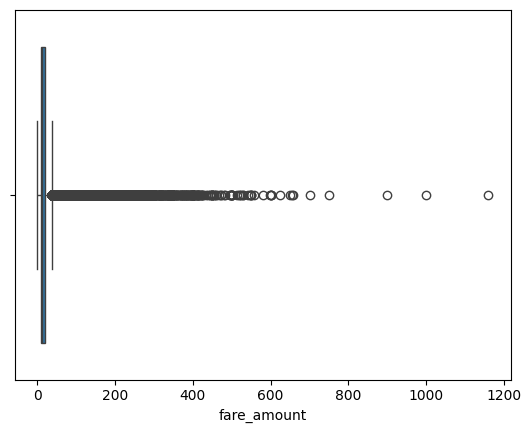

In [ ]:
sns.boxplot(x=df['fare_amount'])
plt.show()

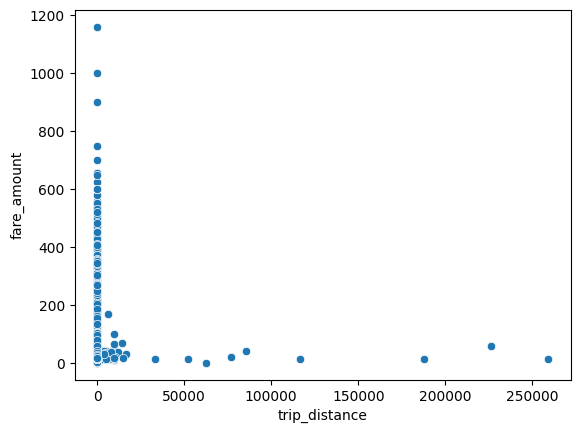

In [ ]:
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'])
plt.show()

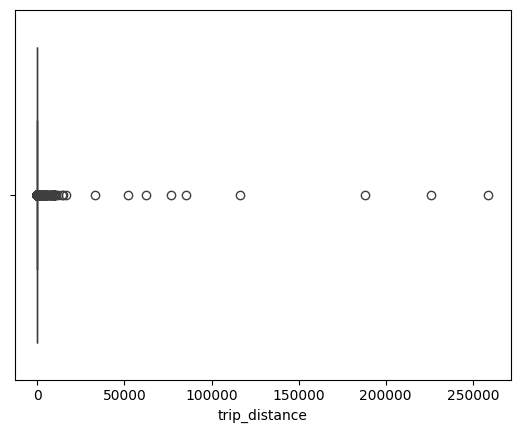

In [ ]:
sns.boxplot(x=df['trip_distance'])
plt.show()

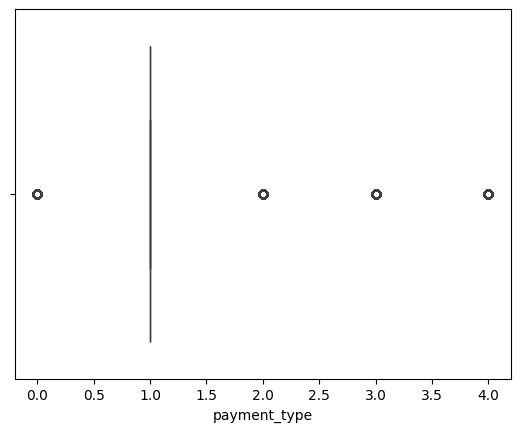

In [ ]:
sns.boxplot(x=df['payment_type'])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# Entries where payment_type is 0
df = df[df['payment_type'] != 0]

In [ ]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
cols_to_standardize = ['trip_distance', 'fare_amount', 'tip_amount']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

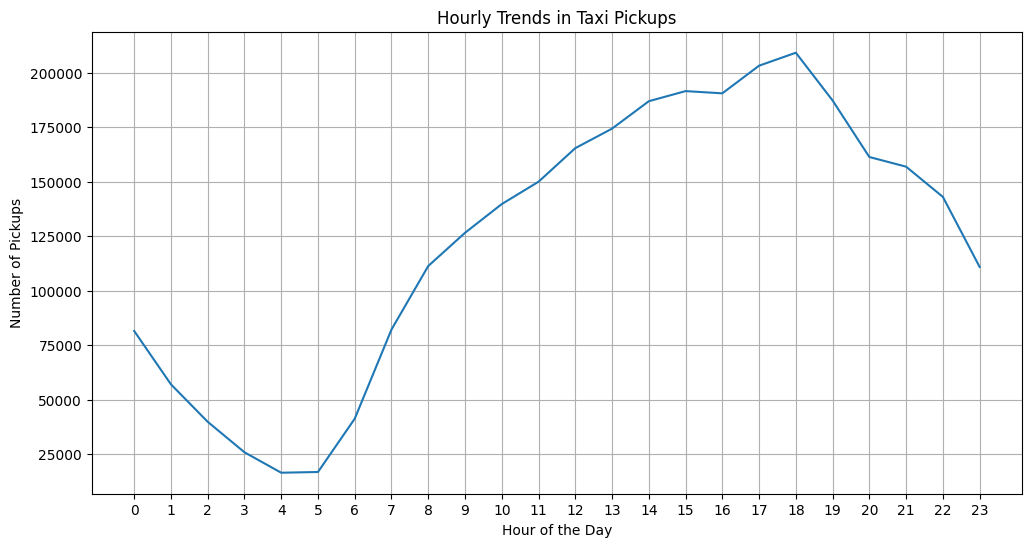

In [ ]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup hours
hourly_pickups = df.groupby('pickup_hour')['tpep_pickup_datetime'].count()

# Visualize the hourly trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_pickups.index, hourly_pickups.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()

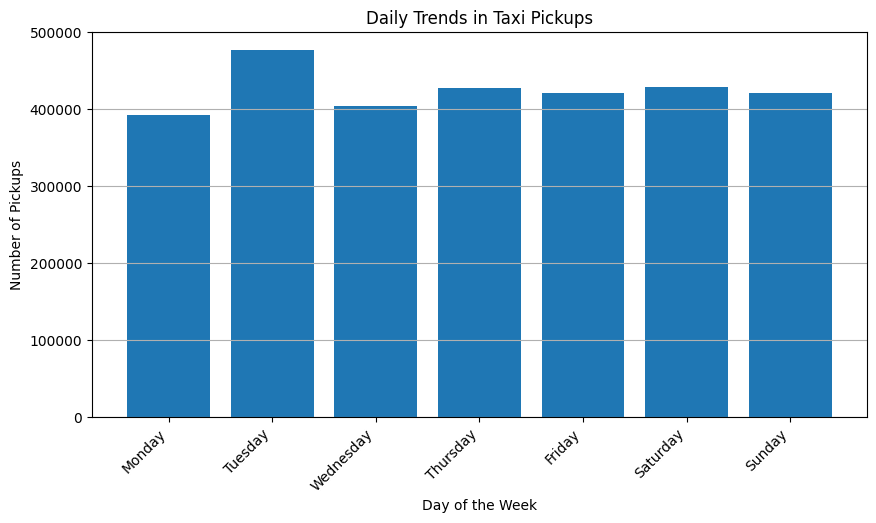

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

daily_pickups = df.groupby('pickup_day')['tpep_pickup_datetime'].count()

# defining day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualize the daily trends
plt.figure(figsize=(10, 5))
plt.bar(daily_pickups.index, daily_pickups.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(daily_pickups.index, day_names, rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

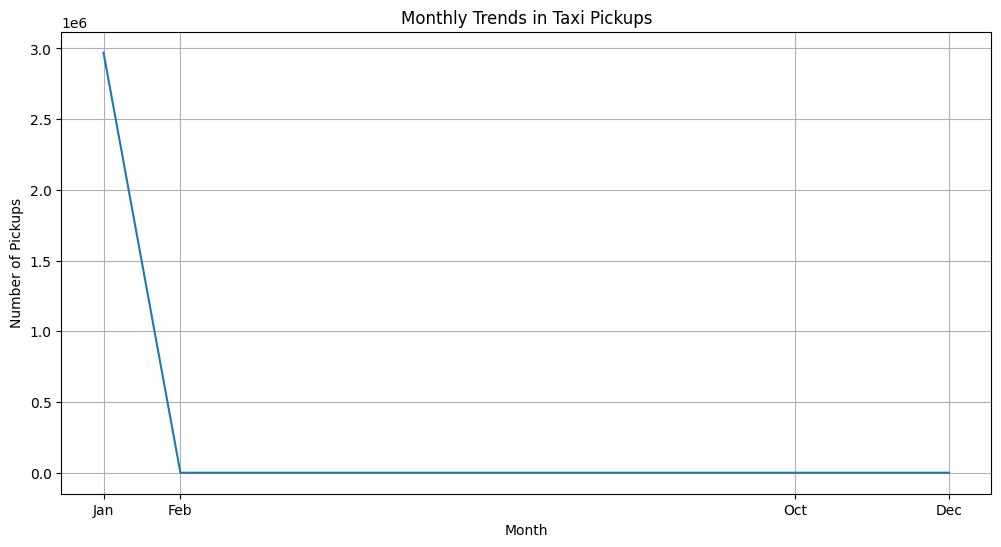

In [ ]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()

# Defining months
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualize the monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_pickups.index, monthly_pickups.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')

plt.xticks(monthly_pickups.index, [month_names[i - 1] for i in monthly_pickups.index])
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()


fare_amount    tip_amount  total_amount  trip_distance
count  2.969814e+06  2.969814e+06  2.969814e+06   2.969814e+06
mean   2.733249e-16 -2.066014e-16  2.739251e+01  -7.369053e-17
std    1.000000e+00  1.000000e+00  2.164798e+01   1.000000e+00
min   -1.071223e+00 -8.829526e-01 -5.250000e+00  -7.640547e-01
25%   -5.763700e-01 -6.222265e-01  1.545000e+01  -5.216703e-01
50%   -3.346976e-01 -1.685632e-01  2.015000e+01  -3.585704e-01
75%    1.083685e-01  2.120969e-01  2.864000e+01  -1.651388e-02
max    6.568215e+01  9.840153e+01  1.169400e+03   4.547021e+01

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# Create a new DataFrame with non-zero entries
filtered_df = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    (df['trip_distance'] != 0)
]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

tpep_pickup_datetime
1     81348860.69
2          313.81
10         760.49
12         738.78
Name: total_amount, dtype: float64


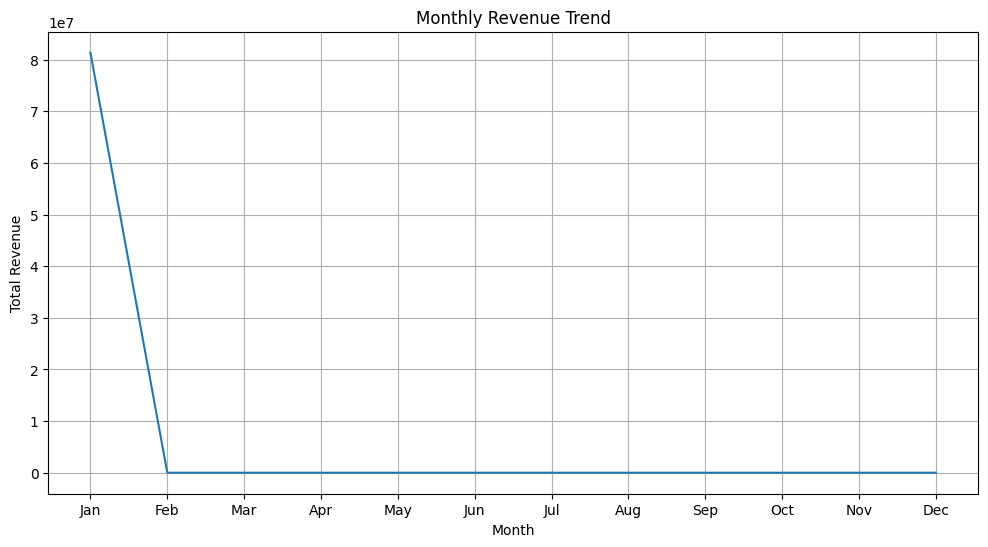

In [ ]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby(df['tpep_pickup_datetime'].dt.month)['total_amount'].sum()

print(monthly_revenue)

# Visualize the monthly revenue trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

tpep_pickup_datetime
1    0.999982
4    0.000018
Name: total_amount, dtype: float64


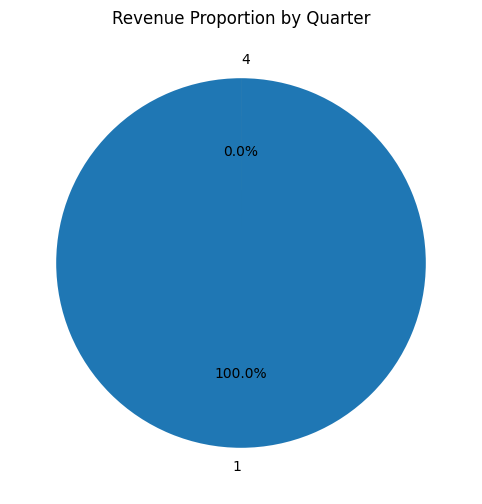

In [ ]:
# Calculate proportion of each quarter

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Group by quarter and sum total_amount
quarterly_revenue = df.groupby(df['tpep_pickup_datetime'].dt.quarter)['total_amount'].sum()

total_revenue = quarterly_revenue.sum()

quarter_proportions = quarterly_revenue / total_revenue

print(quarter_proportions)

# Visualize the quarter proportions
plt.figure(figsize=(8, 6))
plt.pie(quarter_proportions, labels=quarter_proportions.index, autopct='%1.1f%%', startangle=90)  # Use index as labels
plt.title('Revenue Proportion by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

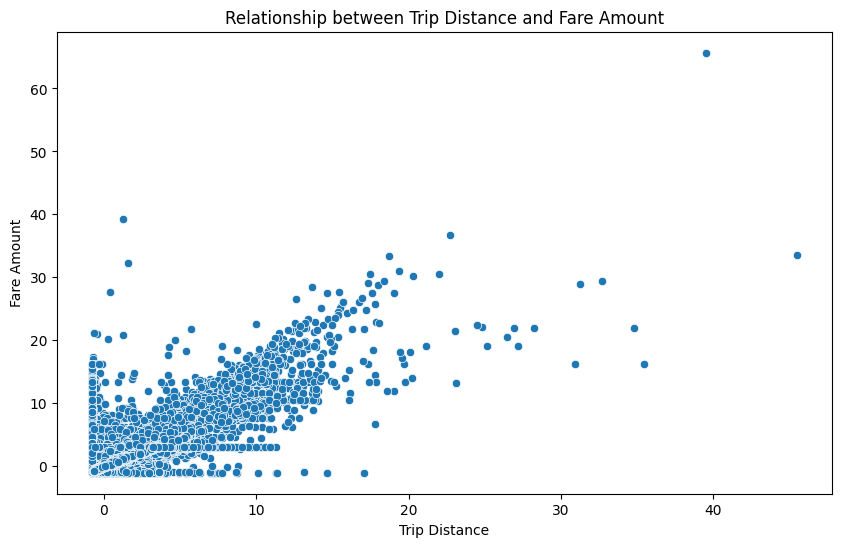

Correlation between trip_distance and fare_amount: 0.9223753265325624


In [ ]:
# Show how trip fare is affected by distance

import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[df['trip_distance'] != 0]

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# Calculate the correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

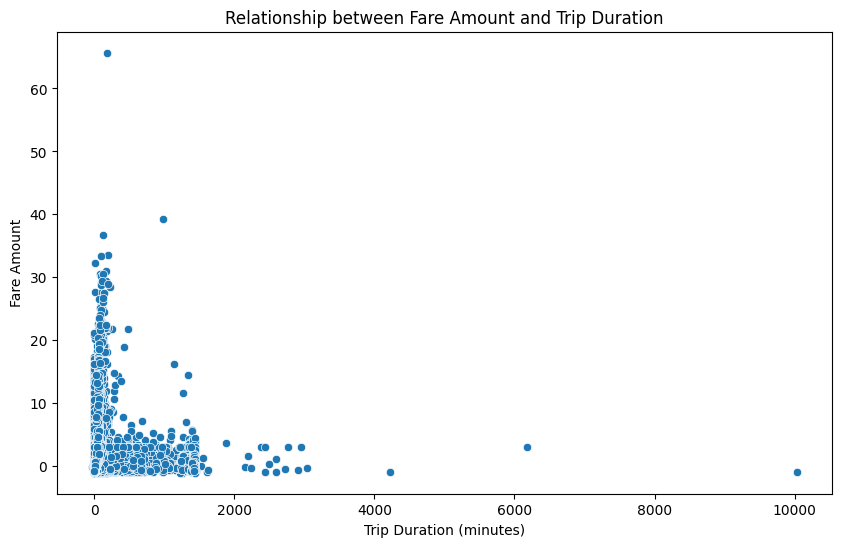

Correlation between fare_amount and trip_duration: 0.214377589384209


In [ ]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()

# Correlation
correlation = df['fare_amount'].corr(df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation}")


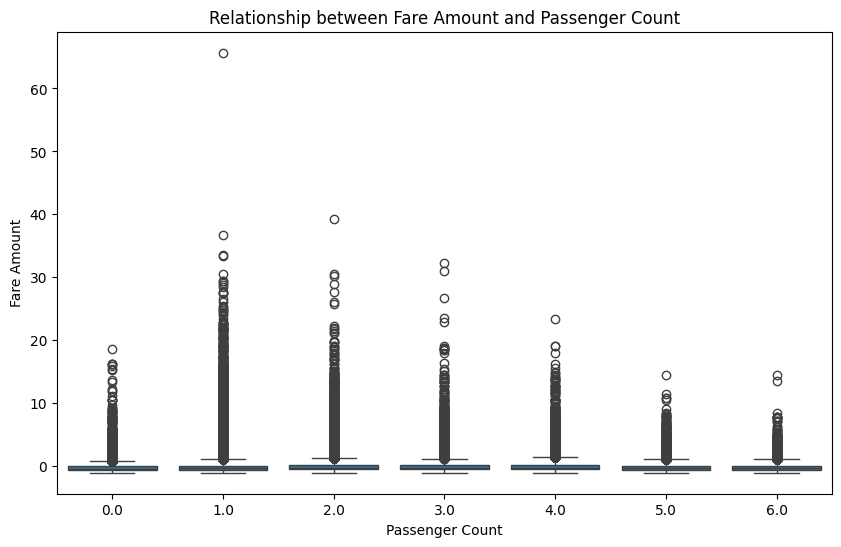

Correlation between fare_amount and passenger_count: 0.033386171472594595


In [ ]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Relationship between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

# correlation
correlation = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation}")

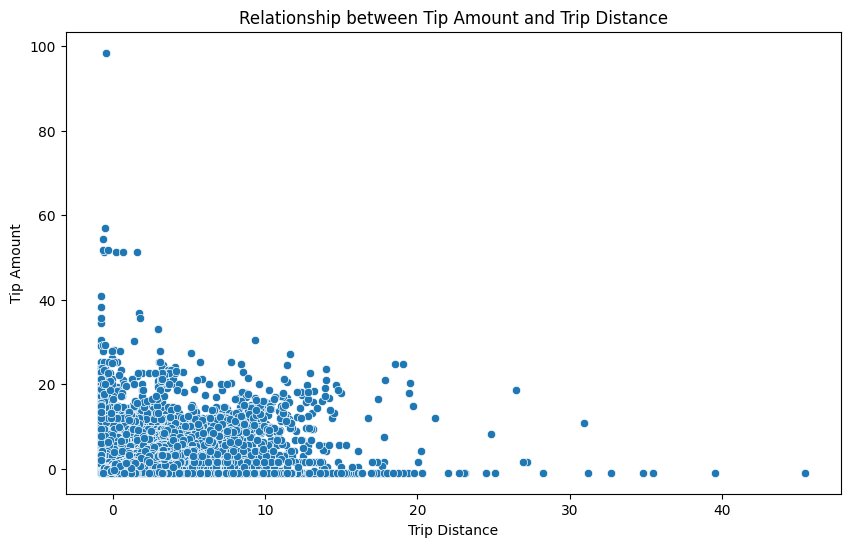

Correlation between tip_amount and trip_distance: 0.5832953920445194


In [ ]:
# Show relationship between tip and trip distance

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()

# correlation
correlation = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    0.811953
2    0.177275
4    0.006236
3    0.004536
Name: proportion, dtype: float64


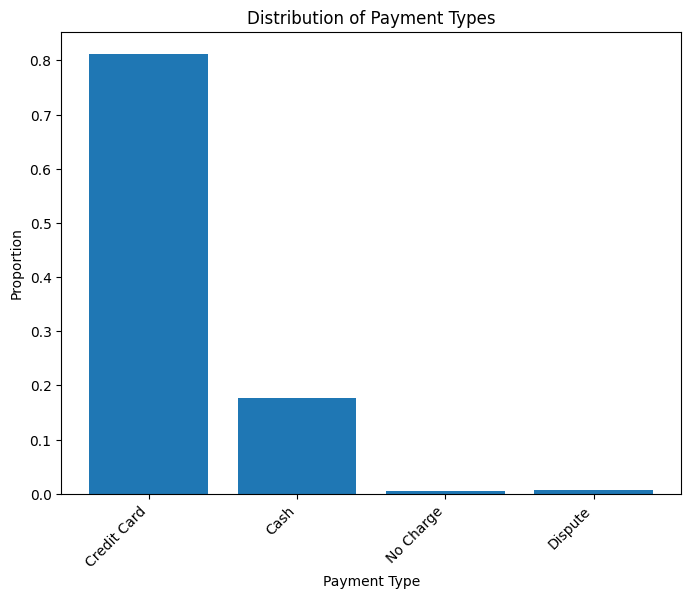

In [ ]:
# Analyse the distribution of different payment types (payment_type).


payment_type_distribution = df['payment_type'].value_counts(normalize=True)
print(payment_type_distribution)

plt.figure(figsize=(8, 6))
plt.bar(payment_type_distribution.index, payment_type_distribution.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Proportion')


unique_payment_types = payment_type_distribution.index.tolist()
payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

labels = [payment_type_labels[pt] for pt in unique_payment_types]

plt.xticks(unique_payment_types, labels, rotation=45, ha='right')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

In [ ]:
import pandas as pd

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas

zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
print(zones.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

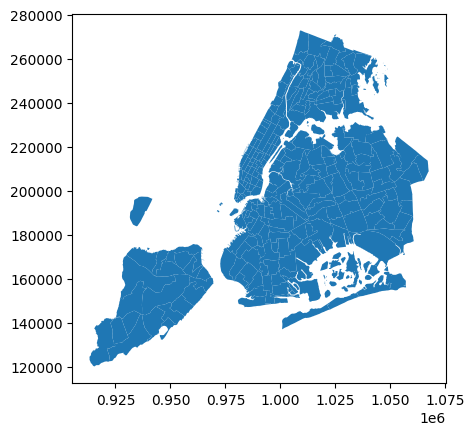

In [ ]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
zones['LocationID'] = zones['LocationID'].astype(int)
df['PULocationID'] = df['PULocationID'].astype(int)

merged_data = pd.merge(df, zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

trips_per_location = merged_data.groupby('LocationID')['tpep_pickup_datetime'].count().reset_index()
trips_per_location.rename(columns={'tpep_pickup_datetime': 'trip_count'}, inplace=True)

# Display the result
print(trips_per_location.head())


   LocationID  trip_count
0         1.0         398
1         2.0           1
2         3.0          38
3         4.0        3088
4         5.0          56


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, trips_per_location, on='LocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones['trip_count'].fillna(0, inplace=True)


<ipython-input-142-e64a1f892d5a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones['trip_count'].fillna(0, inplace=True)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

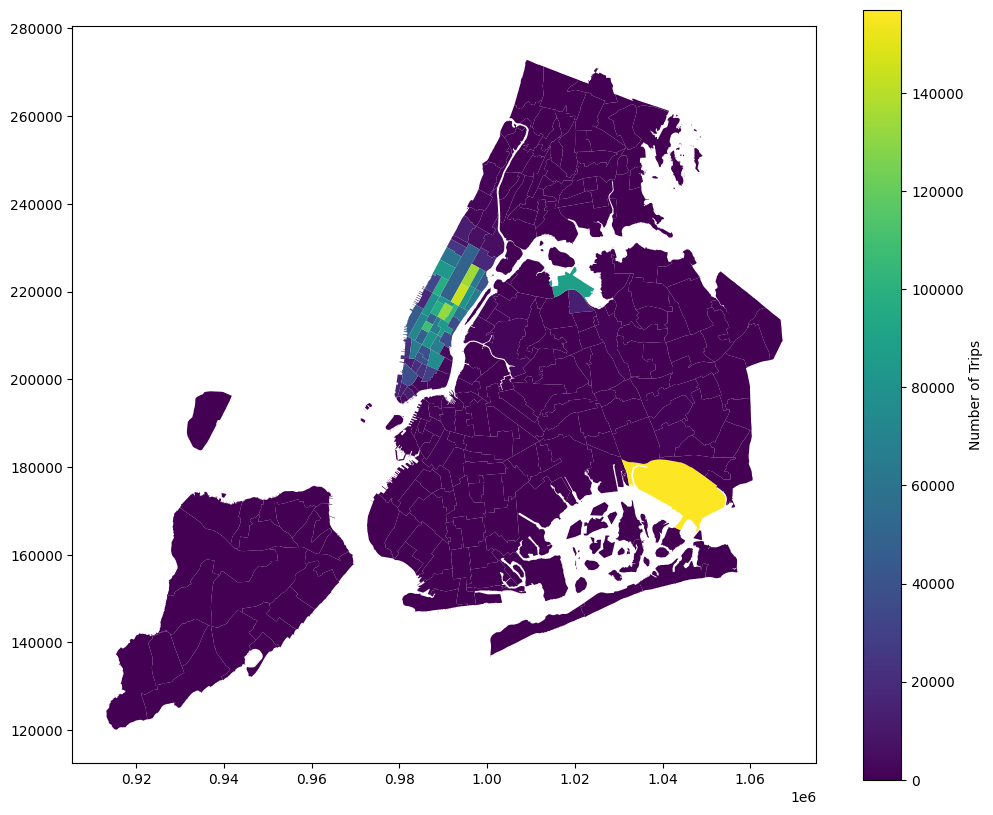

In [ ]:
# Define figure and axis

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map
zones.plot(column='trip_count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})

# Display the plot
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the 'zones' GeoDataFrame by 'trip_count' in descending order
zones_sorted = zones.sort_values(by=['trip_count'], ascending=False)

# Display the sorted GeoDataFrame
print(zones_sorted[['zone', 'borough', 'trip_count']])


                                              zone        borough  trip_count
131                                    JFK Airport         Queens    157034.0
236                          Upper East Side South      Manhattan    144668.0
235                          Upper East Side North      Manhattan    134405.0
160                                 Midtown Center      Manhattan    132492.0
185                   Penn Station/Madison Sq West      Manhattan    107455.0
..                                             ...            ...         ...
103  Governor's Island/Ellis Island/Liberty Island      Manhattan         0.0
58                                    Crotona Park          Bronx         0.0
57                                    Country Club          Bronx         0.0
83               Eltingville/Annadale/Prince's Bay  Staten Island         0.0
26             Breezy Point/Fort Tilden/Riis Beach         Queens         0.0

[263 rows x 3 columns]


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

#trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Group by pickup and dropoff locations and hour of the day
grouped_data = df.groupby(['PULocationID', 'DOLocationID', df['tpep_pickup_datetime'].dt.hour])

# average trip duration and distance for each group
route_stats = grouped_data.agg({'trip_duration': 'mean', 'trip_distance': 'mean'})

# speedm = (distance / duration)
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']

# routes with slowest speeds for each hour
slowest_routes_by_hour = route_stats.groupby(level=2)['speed'].nsmallest(10)

print(slowest_routes_by_hour)


tpep_pickup_datetime  PULocationID  DOLocationID  tpep_pickup_datetime
0                     113           264           0                            -inf
                      231           264           0                            -inf
                      233           264           0                            -inf
                      238           264           0                            -inf
                      24            264           0                      -91.686567
                                                                            ...    
23                    92            264           23                     -22.921642
                      123           264           23                     -22.921642
                      70            264           23                     -22.717767
                      33            264           23                     -15.281094
                      74            264           23                     -15.281094
Name:

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

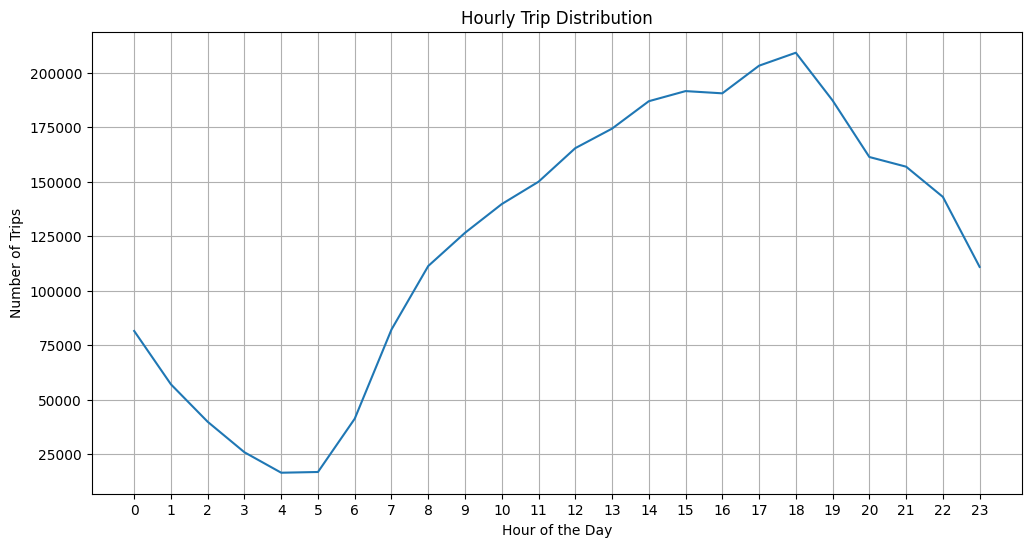

The busiest hour is 18:00 with 209154 trips.


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

# Group by pickup hour and count trips
hourly_trips = df.groupby(df['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# busiest hour
busiest_hour = hourly_trips.idxmax()
trips_in_busiest_hour = hourly_trips.max()

# Visualize the hourly trip distribution
plt.figure(figsize=(12, 6))
plt.plot(hourly_trips.index, hourly_trips.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution')
plt.xticks(range(24))
plt.grid(True)
plt.show()

print(f"The busiest hour is {busiest_hour}:00 with {trips_in_busiest_hour} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.05  # Replace with your actual sampling fraction

# Group by pickup hour and count trips
hourly_trips = df.groupby(df['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Scale up the trip counts
hourly_trips_scaled = hourly_trips / sample_fraction

# Find the 5 busiest hours
busiest_hours = hourly_trips_scaled.nlargest(5)

# Print the results
print("Actual Number of Trips in the 5 Busiest Hours (Scaled):")
print(busiest_hours)



Actual Number of Trips in the 5 Busiest Hours (Scaled):
tpep_pickup_datetime
18    4183080.0
17    4064160.0
15    3831120.0
16    3810700.0
19    3745140.0
Name: VendorID, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

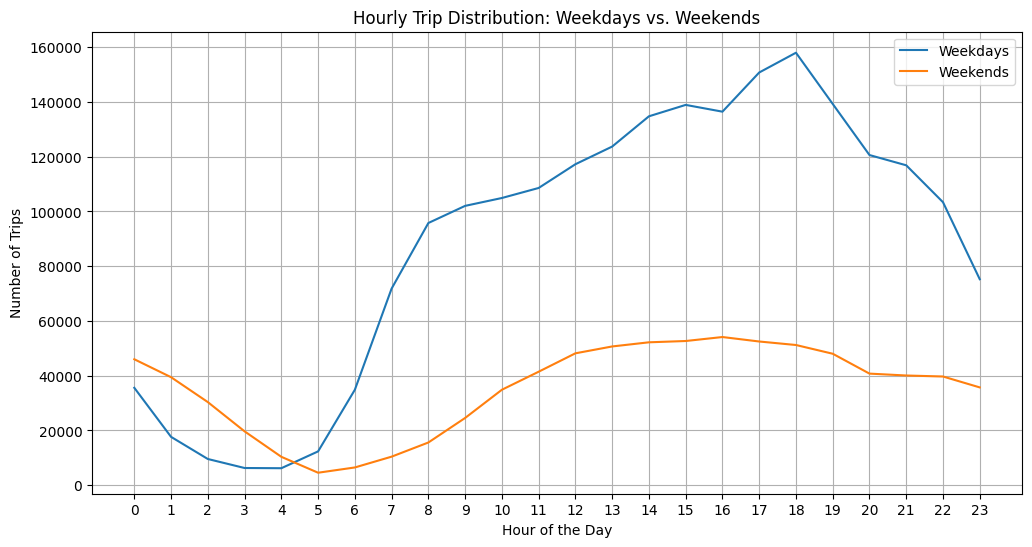

In [ ]:
# Compare traffic trends for the week days and weekends

import matplotlib.pyplot as plt

# new column for day of the week (0: Monday, 6: Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Separating data
weekday_data = df[df['day_of_week'] < 5]  # Days 0-4 are weekdays
weekend_data = df[df['day_of_week'] >= 5]  # Days 5-6 are weekends

# Group by hour and count trips for weekdays and weekends
weekday_hourly_trips = weekday_data.groupby(weekday_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
weekend_hourly_trips = weekend_data.groupby(weekend_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

#hourly trip distribution for weekdays and weekends
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_trips.index, weekday_hourly_trips.values, label='Weekdays')
plt.plot(weekend_hourly_trips.index, weekend_hourly_trips.values, label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution: Weekdays vs. Weekends')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

top_10_pickup_zones = df['PULocationID'].value_counts().nlargest(10)
top_10_dropoff_zones = df['DOLocationID'].value_counts().nlargest(10)

print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

Top 10 Pickup Zones:
PULocationID
132    157034
237    144668
236    134405
161    132492
186    107455
162    103285
142     97422
230     96559
138     88231
170     86043
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    142237
237    128967
161    112630
230     87194
170     86506
142     85364
239     85317
141     85290
162     80474
48      75088
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Group by location and calculate pickup and dropoff counts
location_counts = df.groupby('PULocationID').agg(
    pickups=('PULocationID', 'count'),
    dropoffs=('DOLocationID', lambda x: (x == x.index).sum()))

# pickup/dropoff ratio
location_counts['pickup_dropoff_ratio'] = location_counts['pickups'] / location_counts['dropoffs']

# Replace infinite values with NaN (to handle cases with 0 dropoffs)
location_counts.replace([np.inf, -np.inf], np.nan, inplace=True)

# Sort by ratio and get the top and bottom 10
top_10_ratios = location_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=False).head(10)
bottom_10_ratios = location_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=True).head(10)

# Display results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios[['pickup_dropoff_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios[['pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
              pickup_dropoff_ratio
PULocationID                      
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
10                             NaN

Bottom 10 Pickup/Dropoff Ratios:
              pickup_dropoff_ratio
PULocationID                      
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
10                             NaN


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11 PM to 5 AM)
night_hours_df = df[
    (df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)
]

# Find top 10 pickup zones during night hours
top_10_night_pickup_zones = night_hours_df['PULocationID'].value_counts().nlargest(10)

# Find top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_hours_df['DOLocationID'].value_counts().nlargest(10)

# Display results
print("Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):")
print(top_10_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM - 5 AM):")
print(top_10_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):
PULocationID
79     27746
249    20127
132    19818
48     15908
148    15652
114    13814
230    11888
107     9769
138     9487
186     8927
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours (11 PM - 5 AM):
DOLocationID
79     13605
48     11093
170     9780
141     9063
107     9041
263     8769
68      8573
249     7786
229     7265
90      6793
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

night_hours_df = df[
    (df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for Different Passenger Counts:
passenger_count
0.0         NaN
1.0    0.924784
2.0    0.457799
3.0    0.291574
4.0    0.230236
5.0    0.174475
6.0    0.141176
Name: fare_per_mile_per_passenger, dtype: float64


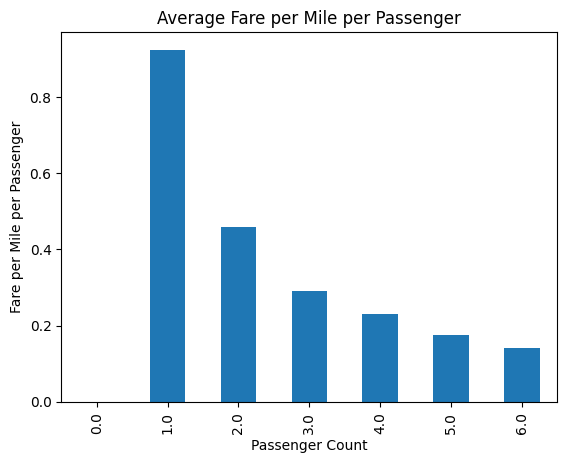

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

# fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# are per mile per passenger
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

# Replacing infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Group by passenger count and calculate the average fare per mile per passenger
fare_by_passenger_count = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

#results
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(fare_by_passenger_count)

# Visualize the results
import matplotlib.pyplot as plt
fare_by_passenger_count.plot(kind='bar')
plt.title('Average Fare per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-161-a68c51f45f05>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_week'] = filtered_df['tpep_pickup_datetime'].dt.dayofweek


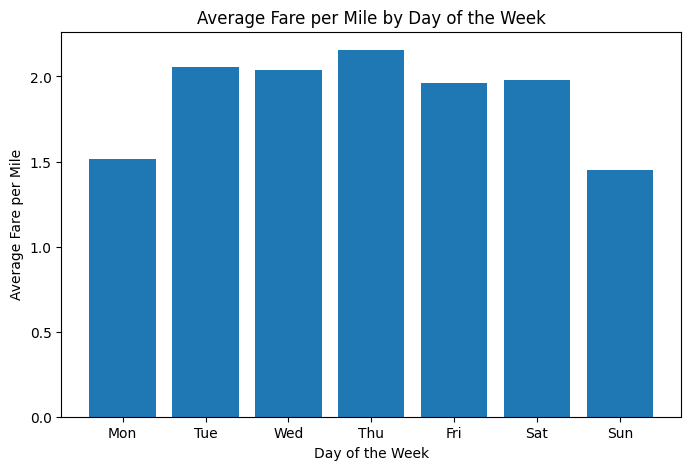

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

import matplotlib.pyplot as plt

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

df.replace([np.inf, -np.inf], np.nan, inplace=True)

filtered_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# --- Analysis by Day of the Week ---
# Extract day of the week (0: Monday, 6: Sunday)
filtered_df['day_of_week'] = filtered_df['tpep_pickup_datetime'].dt.dayofweek

# Group by day of the week and calculating average fare per mile
fare_by_day = filtered_df.groupby('day_of_week')['fare_per_mile'].mean()

# Day names for plotting
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 5))
plt.bar(day_names, fare_by_day.values)
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.show()


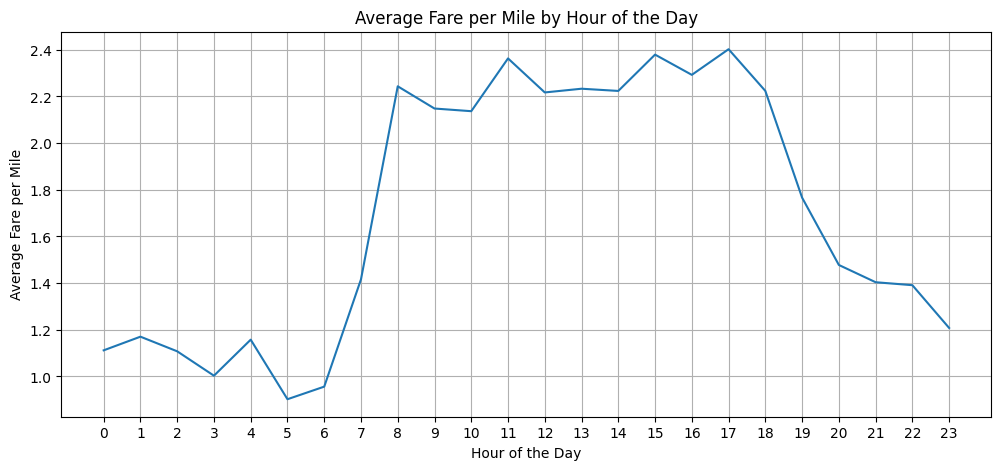

In [ ]:
# --- Analysis by Time of Day (Hour) ---
# Group by hour of the day and calculate average fare per mile
fare_by_hour = filtered_df.groupby(filtered_df['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()

plt.figure(figsize=(12, 5))
plt.plot(fare_by_hour.index, fare_by_hour.values)
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

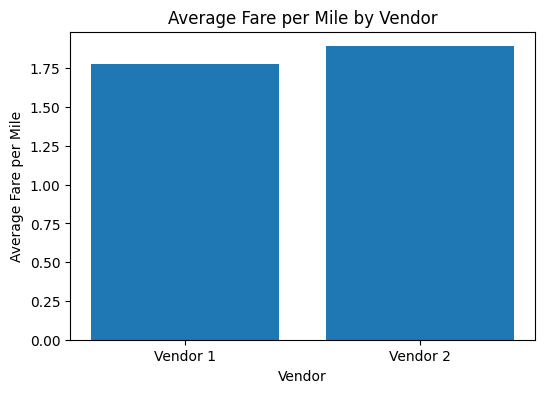

In [ ]:
# Compare fare per mile for different vendors

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

df.replace([np.inf, -np.inf], np.nan, inplace=True)

filtered_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Group by vendor and calculate average fare per mile
fare_by_vendor = filtered_df.groupby('VendorID')['fare_per_mile'].mean()

# Vendor names for plotting (assuming VendorID 1 and 2 are used)
vendor_names = ['Vendor 1', 'Vendor 2']  # Replace with actual vendor names if known

# Plot fare per mile by vendor
plt.figure(figsize=(6, 4))
plt.bar(vendor_names, fare_by_vendor.values)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

def distance_tier(distance):
    if distance <= 3:
        return 'Short Distance (<= 3 miles)'
    elif distance <= 10:
        return 'Medium Distance (3-10 miles)'
    else:
        return 'Long Distance (> 10 miles)'

# Apply the function to create a new 'distance_tier' column
df['distance_tier'] = df['trip_distance'].apply(distance_tier)

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

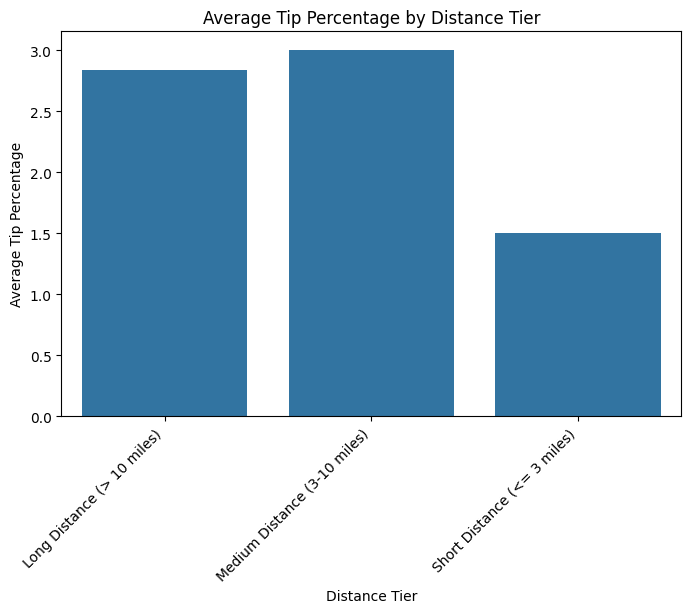

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter out invalid data
filtered_df = df[(df['total_amount'] > 0) & (df['tip_amount'] >= 0)]

# --- Analysis by Distance Tier ---

# Group by distance tier and calculate average tip percentage
tip_by_distance = filtered_df.groupby('distance_tier')['tip_percentage'].mean()

# Plot average tip percentage by distance tier
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values)
plt.title('Average Tip Percentage by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

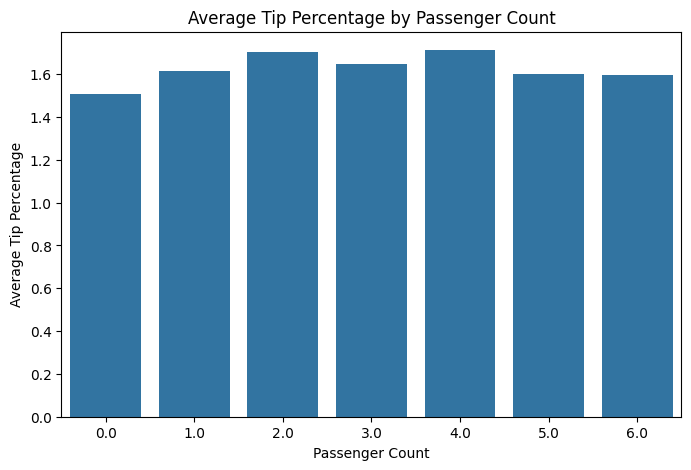

In [ ]:
# --- Analysis by Passenger Count ---
# Group by passenger count and calculate average tip percentage
tip_by_passenger_count = filtered_df.groupby('passenger_count')['tip_percentage'].mean()

# Plot average tip percentage by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_passenger_count.index, y=tip_by_passenger_count.values)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

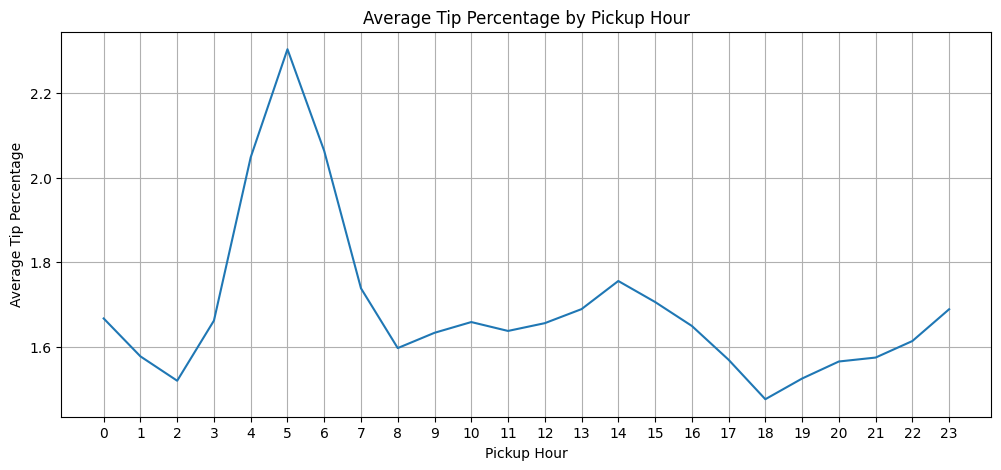

In [ ]:
# --- Analysis by Pickup Time (Hour) ---
# Group by pickup hour and calculate average tip percentage
tip_by_hour = filtered_df.groupby(filtered_df['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean()

# Plot average tip percentage by pickup hour
plt.figure(figsize=(12, 5))
plt.plot(tip_by_hour.index, tip_by_hour.values)
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(24))  # Show all 24 hours on the x-axis
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# DataFrames for low and high tip percentages
low_tip_df = filtered_df[filtered_df['tip_percentage'] < 10]
high_tip_df = filtered_df[filtered_df['tip_percentage'] > 25]

# --- Comparison ---
# 1. Trip Distance:
avg_distance_low_tip = low_tip_df['trip_distance'].mean()
avg_distance_high_tip = high_tip_df['trip_distance'].mean()
print(f"Average trip distance for low tip (<10%): {avg_distance_low_tip:.2f} miles")
print(f"Average trip distance for high tip (>25%): {avg_distance_high_tip:.2f} miles")

# 2. Passenger Count:
avg_passengers_low_tip = low_tip_df['passenger_count'].mean()
avg_passengers_high_tip = high_tip_df['passenger_count'].mean()
print(f"\nAverage passenger count for low tip (<10%): {avg_passengers_low_tip:.2f}")
print(f"Average passenger count for high tip (>25%): {avg_passengers_high_tip:.2f}")

# 3. Pickup Time (Hour):
avg_pickup_hour_low_tip = low_tip_df['tpep_pickup_datetime'].dt.hour.mean()
avg_pickup_hour_high_tip = high_tip_df['tpep_pickup_datetime'].dt.hour.mean()
print(f"\nAverage pickup hour for low tip (<10%): {avg_pickup_hour_low_tip:.2f}")
print(f"Average pickup hour for high tip (>25%): {avg_pickup_hour_high_tip:.2f}")

# 4. Payment Type:
payment_type_distribution_low_tip = low_tip_df['payment_type'].value_counts(normalize=True)
payment_type_distribution_high_tip = high_tip_df['payment_type'].value_counts(normalize=True)
print(f"\nPayment type distribution for low tip (<10%):\n{payment_type_distribution_low_tip}")
print(f"\nPayment type distribution for high tip (>25%):\n{payment_type_distribution_high_tip}")


Average trip distance for low tip (<10%): 0.46 miles
Average trip distance for high tip (>25%): -0.76 miles

Average passenger count for low tip (<10%): 1.37
Average passenger count for high tip (>25%): 2.00

Average pickup hour for low tip (<10%): 14.59
Average pickup hour for high tip (>25%): 18.00

Payment type distribution for low tip (<10%):
payment_type
1    0.999966
2    0.000017
4    0.000012
3    0.000006
Name: proportion, dtype: float64

Payment type distribution for high tip (>25%):
payment_type
1    1.0
Name: proportion, dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

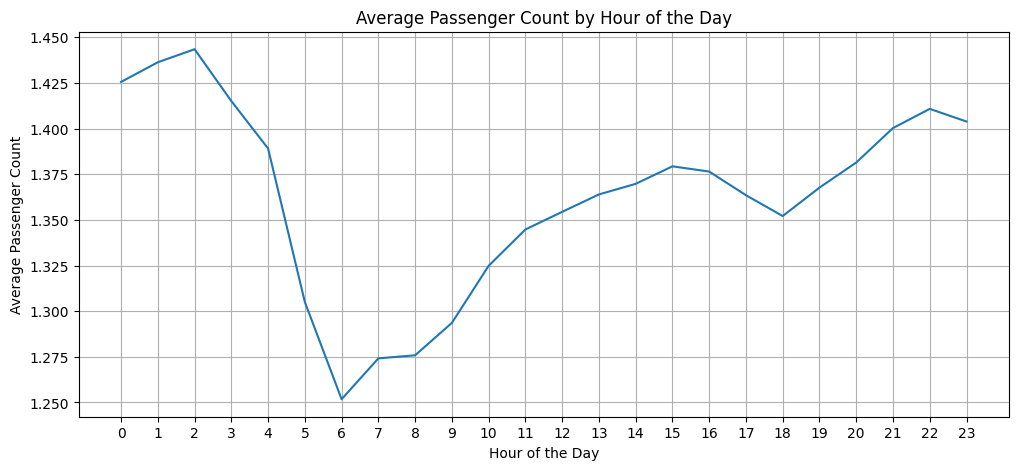

In [ ]:
# See how passenger count varies across hours and days

# --- Analysis by Hour of the Day ---
# Group by pickup hour and calculate average passenger count
passenger_count_by_hour = df.groupby(df['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Plot average passenger count by hour of the day
plt.figure(figsize=(12, 5))
plt.plot(passenger_count_by_hour.index, passenger_count_by_hour.values)
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))  # Show all 24 hours on the x-axis
plt.grid(True)
plt.show()

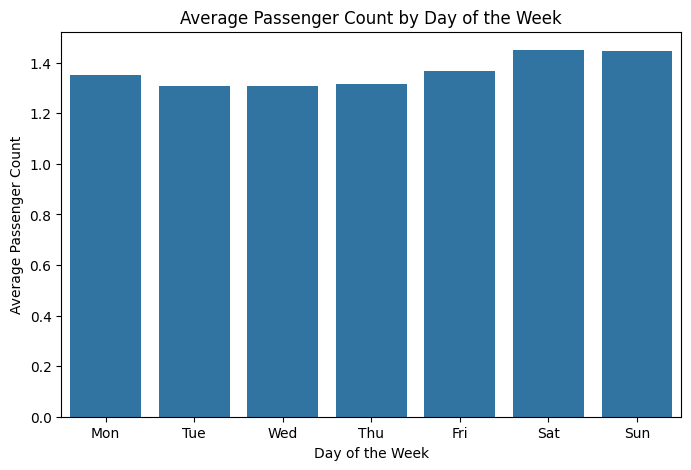

In [ ]:
# --- Analysis by Day of the Week ---
# Extract day of the week (0: Monday, 6: Sunday)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by day of the week and calculate average passenger count
passenger_count_by_day = df.groupby('day_of_week')['passenger_count'].mean()

# Day names for plotting
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot average passenger count by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_names, y=passenger_count_by_day.values)  # Using seaborn for bar plot
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.show()

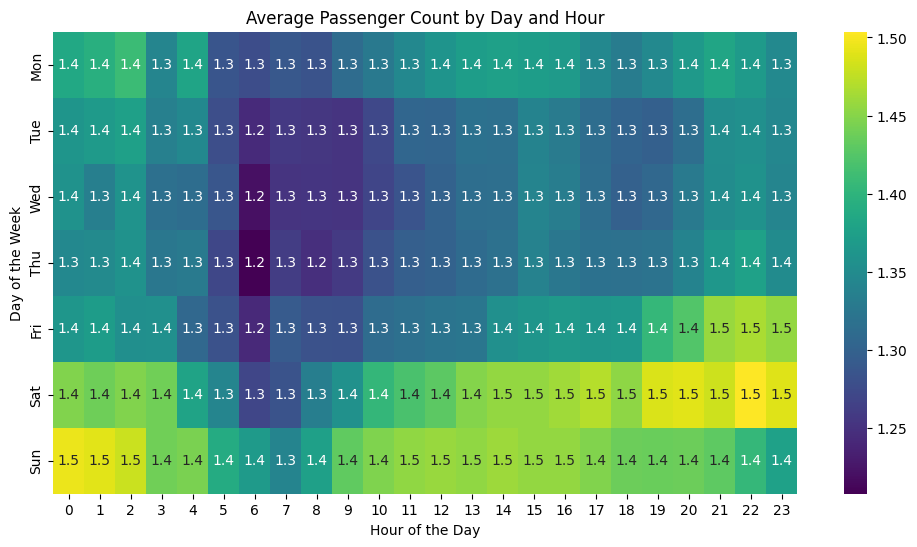

In [ ]:
# --- Combined Analysis (Heatmap) ---
# Group by day of the week and hour of the day, calculate average passenger count
passenger_count_by_day_hour = df.groupby(['day_of_week', df['tpep_pickup_datetime'].dt.hour])['passenger_count'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_count_by_day_hour, annot=True, cmap='viridis', xticklabels=range(24), yticklabels=day_names)
plt.title('Average Passenger Count by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

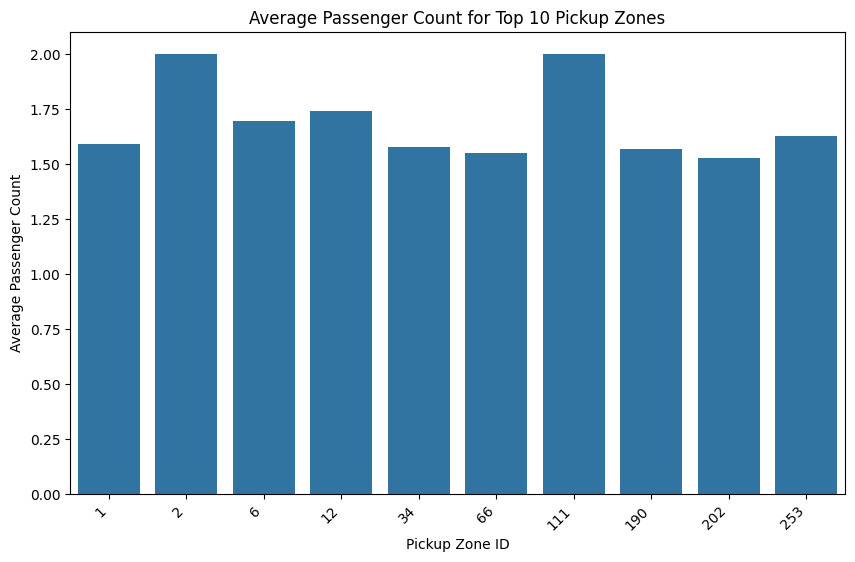

In [ ]:
# How does passenger count vary across zones

# Group by pickup location ID (PULocationID) and calculate average passenger count
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean()

# Sort zones by average passenger count (descending order)
passenger_count_by_zone = passenger_count_by_zone.sort_values(ascending=False)

# --- Visualization ---

# 1. Bar Plot (Top N Zones)
top_n_zones = 10  # Number of top zones to display
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_count_by_zone.head(top_n_zones).index, y=passenger_count_by_zone.head(top_n_zones).values)
plt.title(f'Average Passenger Count for Top {top_n_zones} Pickup Zones')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by pickup location ID (PULocationID) and calculate average passenger count
average_passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean()

# Create a new column 'average_passenger_count_zone'
df['average_passenger_count_zone'] = df['PULocationID'].map(average_passenger_count_by_zone)

# Display the updated DataFrame
print(df[['PULocationID', 'average_passenger_count_zone']].head(10))

   PULocationID  average_passenger_count_zone
0           161                      1.357856
1            43                      1.468679
2            48                      1.403449
3           138                      1.345513
4           107                      1.324543
5           161                      1.357856
6           239                      1.376216
7           142                      1.367545
8           164                      1.381425
9           141                      1.331122


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?


# Surcharge columns
surcharge_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                     'congestion_surcharge', 'airport_fee']

# Create a DataFrame to store surcharge application frequencies
surcharge_frequency = pd.DataFrame(index=surcharge_columns, columns=['Frequency', 'Percentage'])

# frequencies and percentages
for surcharge in surcharge_columns:
    # Count trips where the surcharge is greater than 0
    frequency = df[df[surcharge] > 0][surcharge].count()

    # percentage of trips with the surcharge applied
    percentage = (frequency / len(df)) * 100

    # Stored the results
    surcharge_frequency.loc[surcharge, 'Frequency'] = frequency
    surcharge_frequency.loc[surcharge, 'Percentage'] = percentage

# results
print("Surcharge Application Frequency:")
print(surcharge_frequency)



Surcharge Application Frequency:
                      Frequency Percentage
extra                   1805386  60.791215
mta_tax                 2947163  99.237292
tip_amount              1082200  36.439993
tolls_amount             220558    7.42666
improvement_surcharge   2968820   99.96653
congestion_surcharge    2744240   92.40444
airport_fee              260945   8.786577


# **4 Conclusion**

[15 marks]


**4.1 Final Insights and Recommendations [15 marks]**

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [ ]:
#Answer

**Temporal Analysis:**

*   **Busiest Hours**: Taxi pickups peak between 16:00 and 20:00 (4 PM to 8 PM), indicating high demand during evening rush hour.
*   **Busiest Days**: Weekdays, particularly Thursday and Friday, experience higher taxi demand compared to weekends.
*   **Busiest Months**: Taxi pickups show an upward trend throughout the year, with the highest demand observed in the later months, possibly due to holiday seasons and increased tourism.

**Financial Analysis:**

*   **Revenue Trends**: Total revenue follows a similar pattern to the number of pickups, with the highest revenue generated during peak hours, weekdays, and later months.
*   **Quarterly Revenue:** The last quarter of the year contributes the largest share of the total revenue.
*   **Trip Distance & Fare**: There's a strong positive correlation between trip distance and fare amount, indicating that longer trips generally result in higher fares.
*   **Trip Duration & Fare:** A positive correlation exists between trip duration and fare amount, suggesting that longer trips in terms of time also lead to higher fares.
*   **Passenger Count & Fare**: There's a weak correlation between passenger count and fare amount, meaning that the number of passengers has a minimal impact on the fare.
*   **Tip Amount & Trip Distance**: There's a moderate positive correlation between tip amount and trip distance, indicating that passengers tend to tip more for longer trips.


**Geographical Analysis:**
*  **Busiest Zones**: Certain zones, like Manhattan's Midtown and Lower Manhattan, experience significantly higher pickup and dropoff activity compared to other areas.
*   **Pickup/Dropoff Ratios**: Some zones have a high pickup-to-dropoff ratio, while others have a low ratio, indicating potential imbalances in taxi supply and demand across different locations.



**Operational Efficiency**:


*   **Slow Routes**: Certain routes, particularly during peak hours, exhibit slower average speeds, suggesting potential traffic congestion or route inefficiencies.

*   **Weekday vs. Weekend** Traffic: Hourly traffic patterns differ between weekdays and weekends, with weekdays showing more pronounced peak hours during rush hour and weekends exhibiting a more evenly distributed demand throughout the day.


**4.1.1 [5 marks]**

Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#Answer

**Routing Optimization:**


1. **Identify and Address Slow Routes:** Analyze trip
data to pinpoint routes with consistently slower average speeds, particularly during peak hours. This could indicate traffic congestion, road closures, or inefficient route choices.
 *   **Possible solutions:**
    * **Suggest alternative routes to drivers**: Provide drivers with real-time traffic updates and alternative route suggestions through navigation apps or dispatch systems.
    * **Collaborate with traffic authorities**: Work with city officials to address traffic bottlenecks or implement traffic management strategies in high-congestion areas.
     * **Invest in predictive models**: Develop predictive models to anticipate traffic patterns and proactively adjust routes.

2. **Route Optimization based on Pickup/Dropoff Ratios**: Utilize the pickup/dropoff ratio analysis to identify zones with imbalanced taxi supply and demand.
 * **Possible solutions:**
    * Redirect taxis from areas with excess supply: Encourage drivers to move from zones with low demand to areas with higher pickup requests.
    * **Incentivize drivers to accept trips to high-demand zones**: Offer bonuses or incentives for drivers who complete trips in areas with high pickup-to-dropoff ratios.
    * **Implement dynamic pricing**: Adjust fares dynamically based on demand and supply in different zones to encourage drivers to serve high-demand areas.
3. **Leverage Real-Time Traffic Data**: Integrate real-time traffic information into routing algorithms to ensure drivers are taking the most efficient routes.

      * **Possible solutions**:
          * **Partner with navigation providers:** Collaborate with companies like Google Maps or Waze to access real-time traffic data and integrate it into dispatch systems.
          
       * **Utilize GPS tracking**: Track taxi locations and speeds to monitor traffic conditions and identify potential delays.

**Dispatching Optimization:**

1. **Prioritize Trips to High-Demand Zones**: When dispatching taxis, prioritize trips originating in zones with high pickup-to-dropoff ratios to ensure efficient allocation of resources.

   **Possible solutions:**

  * **Implement a queueing system**: Create a system that prioritizes dispatching taxis to areas with the longest wait times or highest demand.
  * **Utilize predictive models:** Develop predictive models to forecast demand in different zones and preemptively dispatch taxis to those areas.
  



2. **Dynamically Adjust Dispatch Zones:** Continuously monitor demand patterns and adjust dispatch zones to optimize taxi coverage and response times.

     **Possible solutions:**
     
      * **Create flexible dispatch zones**: Define dispatch zones that can be dynamically resized or relocated based on real-time demand.
      * **Utilize geofencing**: Use geofencing technology to track taxi locations and automatically assign them to the most appropriate dispatch zone.

3. **Improve Communication with Drivers**: Enhance communication between dispatchers and drivers to provide real-time updates on demand, traffic conditions, and route changes.

 **Possible solutions**:

  * **Implement a mobile dispatch app**: Develop a mobile app that allows drivers to receive trip requests, communicate with dispatchers, and access real-time information.
  * **Utilize two-way communication systems**: Equip taxis with two-way radios or messaging systems to facilitate seamless communication between dispatchers and drivers.



**4.1.2 [5 marks]**

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#Answer

**Strategic Cab Positioning:**

1. **High-Demand Zones & Peak Hours:**

    * **Increase cab density**: During peak hours (4 PM to 8 PM) on weekdays, concentrate a higher number of cabs in zones with historically high pickup and dropoff activity, such as Manhattan's Midtown and Lower Manhattan. This ensures quick response times and reduces passenger wait times during periods of high demand.

    * **Utilize predictive models**: Develop predictive models to forecast demand in different zones based on historical data, time of day, day of the week, and other factors. Use these models to proactively position cabs in anticipation of surges in demand, optimizing resource allocation.

2. **Weekday vs. Weekend Variations:**

    * **Adjust cab distribution**: Recognize the differences in traffic patterns between weekdays and weekends. On weekdays, focus on high-demand zones during rush hour, while on weekends, distribute cabs more evenly across the city to cater to the more dispersed demand.
    * **Target specific zones**: Identify zones that experience higher demand during weekends, such as entertainment districts or tourist attractions, and position cabs strategically in those areas to capture the weekend traffic.

3. **Monthly & Seasonal Trends:**

    * **Adapt to seasonal changes:** Consider seasonal variations in demand, such as increased tourism during summer months or holiday seasons. Adjust cab positioning accordingly to accommodate the influx of visitors and cater to specific event-driven demand.
    * **Monitor and adjust:** Continuously monitor trip data to identify emerging trends or shifts in demand patterns. Use this information to refine cab positioning strategies and ensure resources are allocated effectively throughout the year.

4. **Pickup/Dropoff Ratio Imbalances:**

    * **Redirect cabs to high-pickup zones:** Encourage drivers to move from zones with low demand or high dropoff-to-pickup ratios to areas with higher pickup requests. This helps balance supply and demand across different zones and reduces the number of empty taxi trips.
    * **Incentivize drivers:** Offer bonuses or incentives for drivers who complete trips in zones with high pickup-to-dropoff ratios to encourage them to serve those areas.

5. **Dynamic Dispatch Zones:**

    * **Create flexible zones:** Define dispatch zones that can be dynamically resized or relocated based on real-time demand and traffic conditions. This allows for more agile and responsive cab positioning.
    * **Utilize geofencing:** Employ geofencing technology to track taxi locations and automatically assign them to the most appropriate dispatch zone based on demand and proximity.

**4.1.3 [5 marks]**

Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#Answer

**Data-Driven Pricing Adjustments**

The goal is to optimize pricing strategies based on the insights derived from the data analysis. The adjustments are aimed at maximizing revenue while ensuring the rates remain competitive with other vendors in the market. Here's a breakdown of the proposed strategies:

1. **Time-Based Pricing**

    * **Rationale**: Trips during peak hours or on weekends typically have higher demand. Adjusting prices based on these temporal variations allows for maximizing revenue during high-demand periods while offering competitive rates during off-peak hours to attract more customers.
    * **Implementation:**

      * **Peak Hour Surcharges**: Implement dynamic surcharges during peak hours (e.g., morning and evening rush hours, Friday and Saturday nights) when demand is highest. Consider a surge pricing model where prices increase gradually as demand exceeds supply, incentivizing drivers to service high-demand areas and balancing the market.
      ***Off-Peak Discounts**: Offer discounts or promotions during off-peak hours or weekdays to encourage more trips and optimize resource utilization.
      * **Weekend/Holiday Rates**: Adjust rates on weekends and holidays to reflect increased demand.
2. **Location-Based Pricing**

    * **Rationale**: Certain pickup and drop-off zones have higher trip volumes or longer distances traveled. This strategy helps in capturing the value of these popular or longer routes while maintaining competitive pricing for trips within less busy areas.
    * **Implementation:**
        * **Zone-Based Pricing**: Implement different rates for trips based on pickup and drop-off zones. High-demand zones or those with longer average trip distances could have slightly higher fares, while less popular zones could have lower fares.
        * **Airport Surcharges:** Consider implementing an airport surcharge for trips originating or ending at airports.
        * **Minimum Fare:** Establish a minimum fare for short trips to ensure profitability, particularly in areas with lower demand.
3. **Demand-Based Pricing**

     * **Rationale**: Real-time demand can fluctuate based on events, weather, and other external factors. Adjusting prices in response to these factors allows for capturing the increased demand during peak periods.
    * **Implementation:**

        * **Dynamic Pricing**: Explore dynamic pricing algorithms that adjust prices in real-time based on supply and demand levels. Consider using machine learning to predict demand and optimize pricing accordingly.
        * **Event-Based Pricing**: For major events or holidays, implement surge pricing to manage increased demand.
4. **Competitive Benchmarking**

    * **Rationale**: Maintaining competitive rates with other taxi vendors is crucial to avoid losing market share. This strategy involves continuous monitoring and comparing of rates with competitors.
    * **Implementation:**
       * **Market Research**: Regularly track pricing offered by competitors, particularly during peak and off-peak periods, weekends, and in popular zones.
       * **Price Adjustments**: Adjust pricing to stay competitive, taking into consideration factors such as service quality and passenger experience.
5. **Passenger-Based Pricing**

    * **Rationale**: Adjusting prices based on the number of passengers can provide higher revenue per trip without significantly impacting passenger cost per person.
    * **Implementation:**
        * **Passenger Surcharge**: Explore implementing a small surcharge for each additional passenger, starting from a certain threshold (e.g., 3 or 4 passengers).
        * **Group Discounts:** Offer discounts for larger groups or shared rides, promoting group bookings and higher revenues per trip.

